<a href="https://colab.research.google.com/github/Skarthikak/AI-Search/blob/main/The_Boys_Universe_A_Data_Driven_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- The Boys Universe: A Data-Driven Report ---



--- Data Loading (Internal Mock Data for The Boys Universe) ---

Data Loading Complete. DataFrames created:
  - Characters: 16 rows
  - Factions: 6 rows
  - Events: 8 rows
  - Character-Event Bridge: 34 rows

--- Data Cleaning & Preparation ---
Data Cleaning & Preparation Complete.

--- Advanced Analytics & Insights ---

Average Character Scores by Moral Alignment:


,PublicApproval,CombatProwess,Intelligence
MoralAlignment,,,
Anti-Hero,31.2,88.2,71.2
Evil,62.2,73.7,64.2
Hero,68.7,72.0,81.3



Top 3 Most Impactful Events:


,EventName,ImpactScore
3,Battle of Vought Tower,98
0,Transoceanic Flight Disaster,95
2,Stormfront Exposure,90



Top 5 Most Common Power Keywords:


,count
Super,12
Strength,9
Durability,4
Heat,2
Temporary,2



Performing K-Means Clustering on Characters...

Cluster Profiles (n=3 clusters):


,PublicApproval,CombatProwess,Intelligence
Cluster,,,
0,75.0,81.2,79.1
1,21.2,89.2,68.8
2,56.2,55.0,62.5


/tmp/ipython-input-3785058993.py:665: UserWarning:

The palette list has more values (6) than needed (5), which may not be intended.




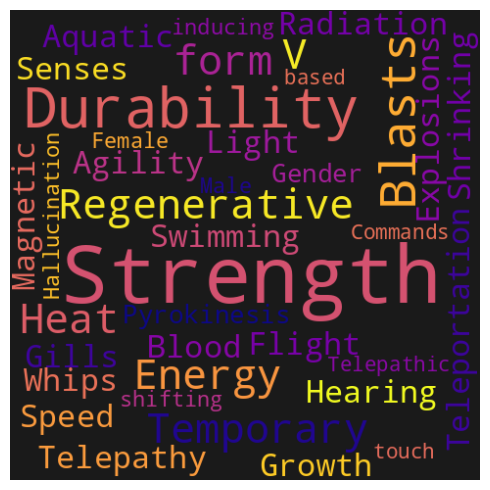
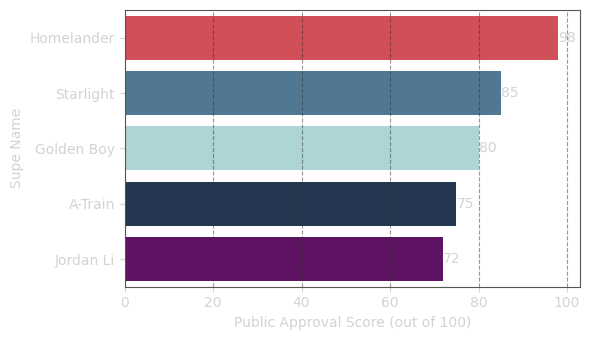
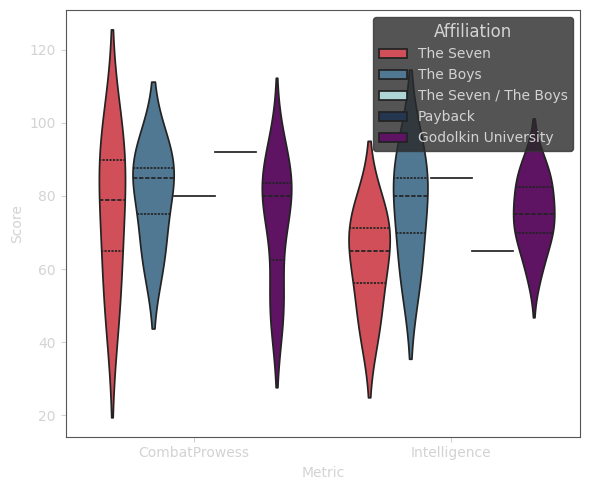
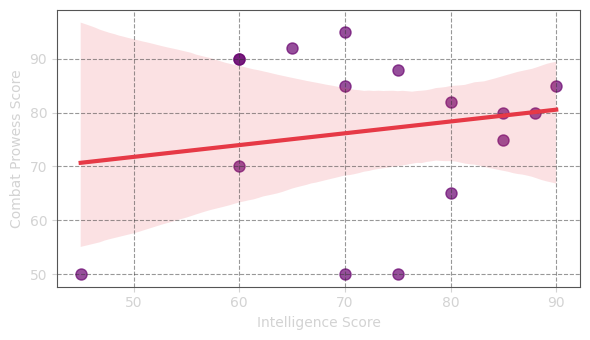


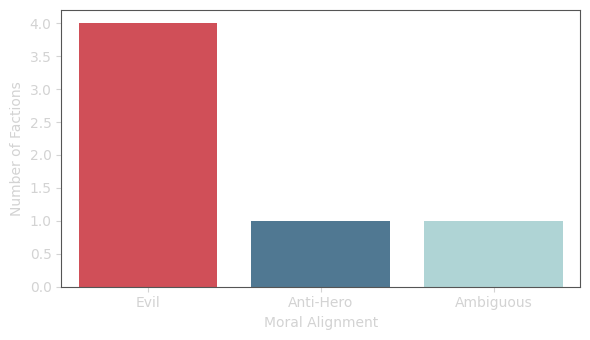
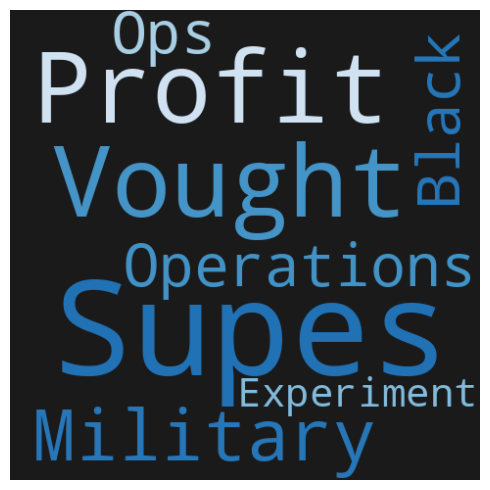
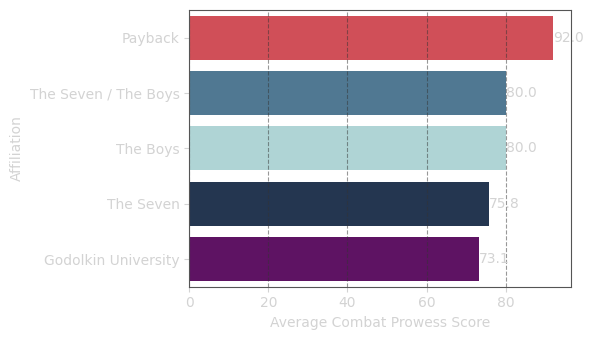


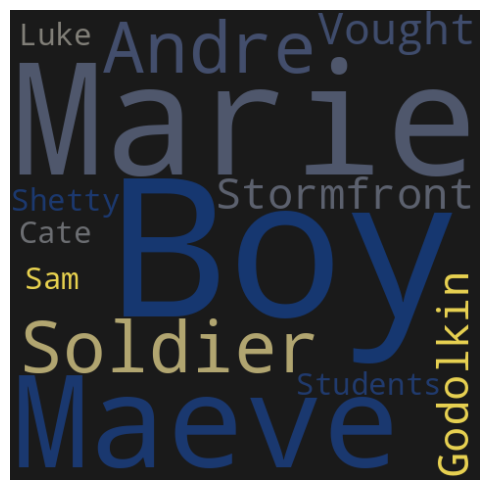
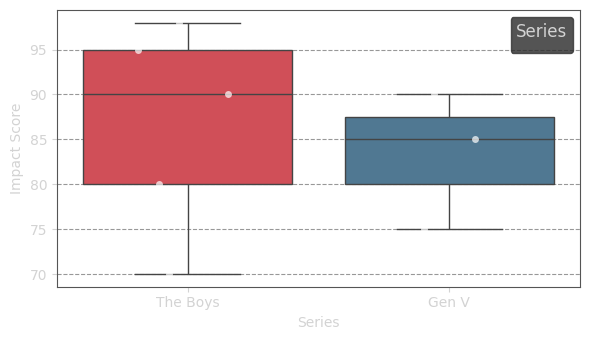

EventName,Role,Series,Season,CharacterStatusAtEvent
Transoceanic Flight Disaster,Main Perpetrator,The Boys,1,"Caused the plane crash, covering it up."
Compound V Leak,Antagonist,The Boys,1,Maintains Vought's secrecy.
Battle of Vought Tower,Main Perpetrator,The Boys,3,Led the assault against The Boys.
Godolkin Attack,Antagonist,Gen V,1,Killed Dean Shetty.
EventName,Role,Series,Season,CharacterStatusAtEvent
Transoceanic Flight Disaster,Avenger,The Boys,1,Seeks revenge against Homelander.
Compound V Leak,Investigator,The Boys,1,Uncovers Compound V secret.
Stormfront Exposure,Avenger,The Boys,2,Fights Stormfront.
Battle of Vought Tower,Fighter,The Boys,3,Fights against Supes.
EventName,Role,Series,Season,CharacterStatusAtEvent

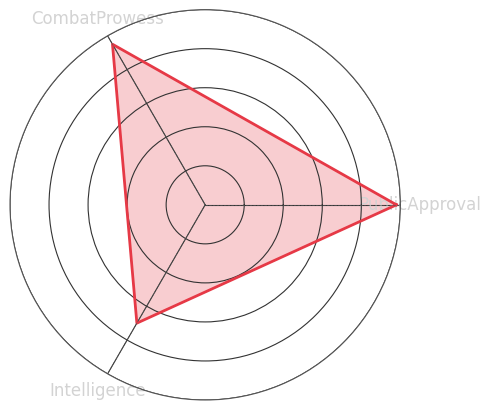
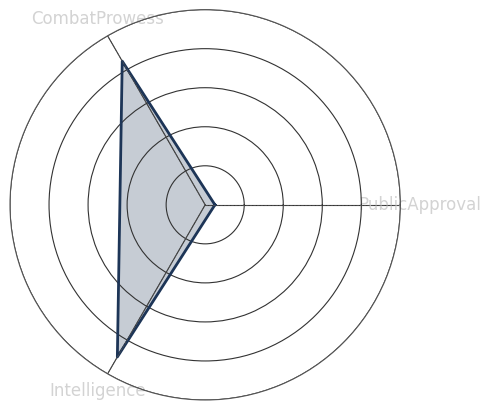
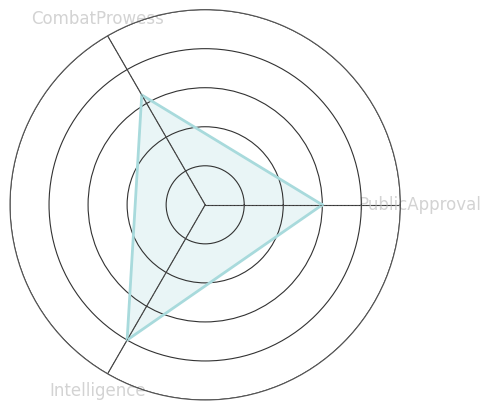
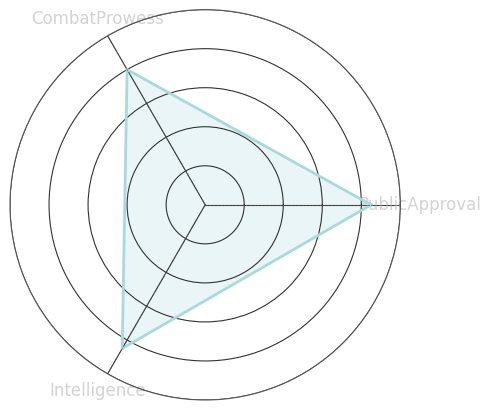
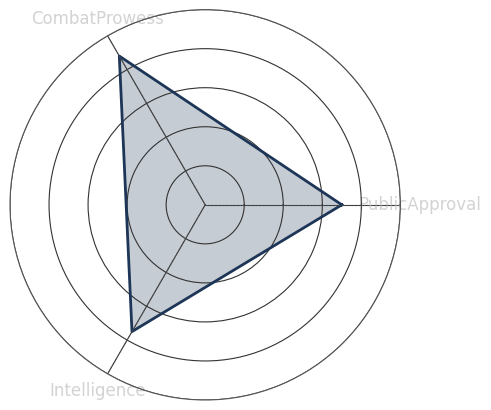
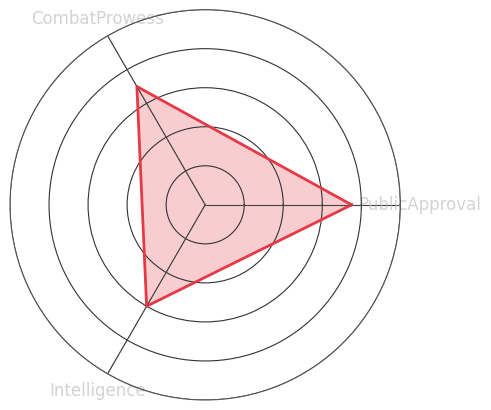
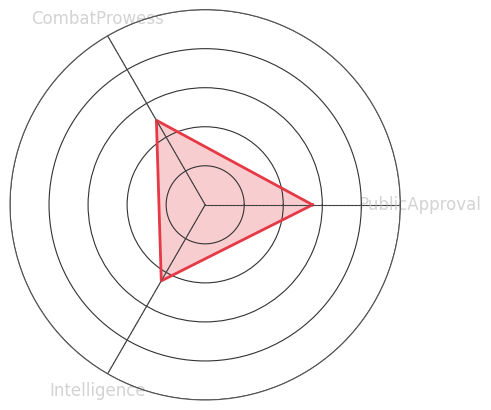
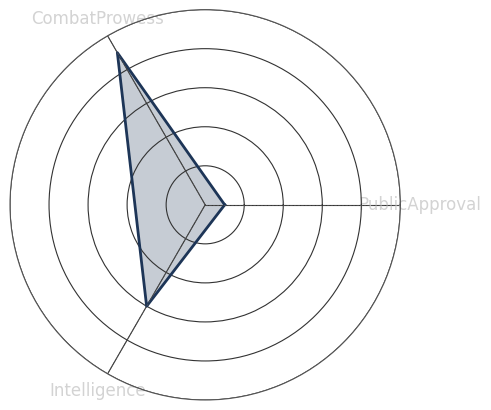
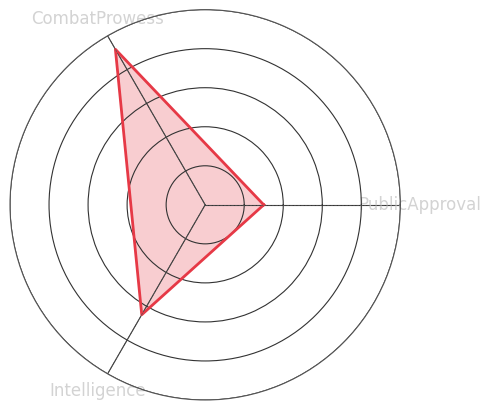
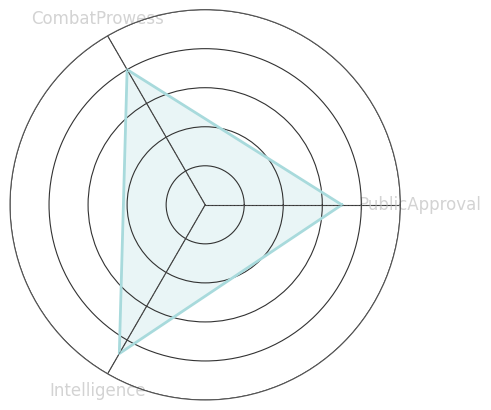
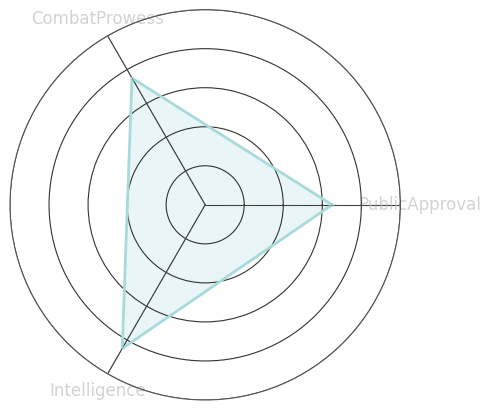
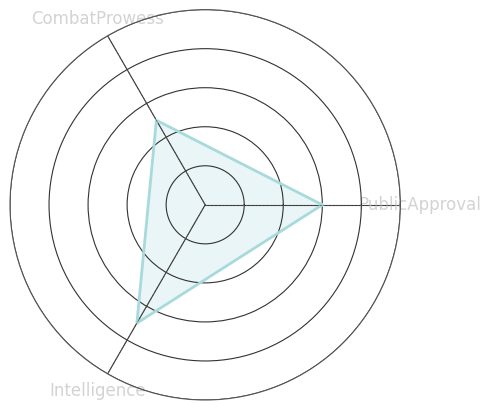
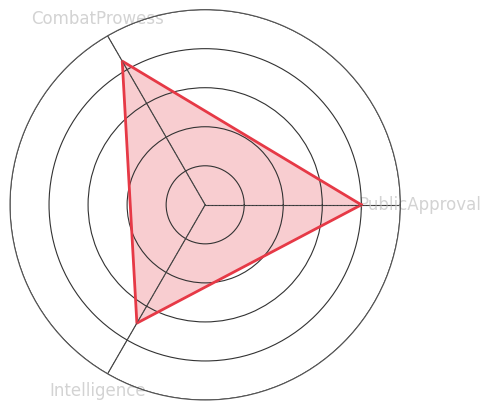
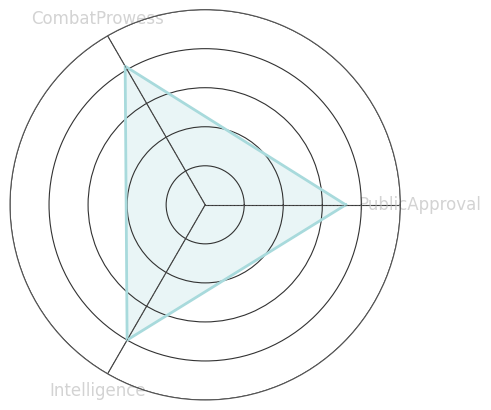
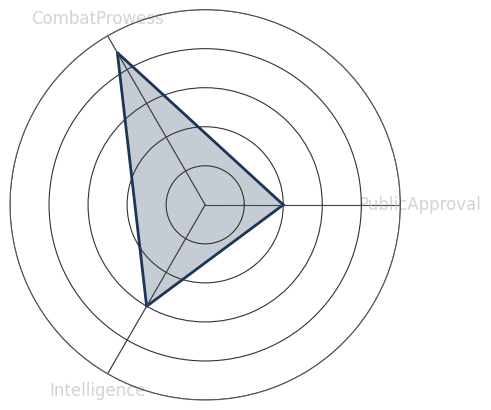
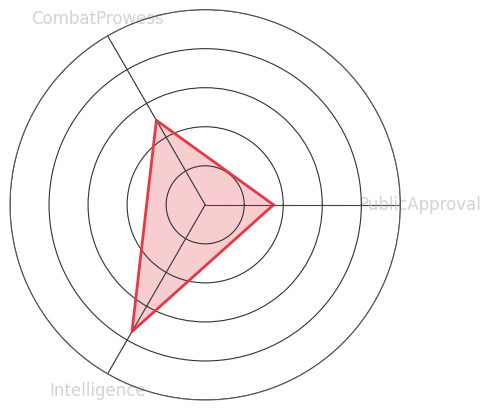


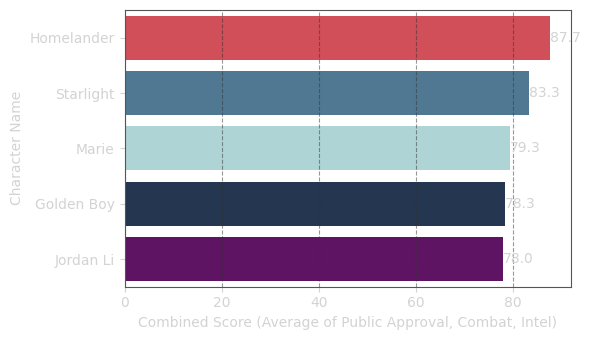


--- The Boys Universe Dashboard Report: Complete ---


In [18]:
# --- 1. Setup: Install Libraries & Import ---
# !pip install pandas matplotlib seaborn plotly wordcloud kaleido # kaleido for static Plotly image export if needed
# !pip install scikit-learn # For K-Means clustering

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display, HTML
from wordcloud import WordCloud
import io
import numpy as np
from math import pi # For radar chart
import base64 # Required for embedding Matplotlib plots as images
from io import BytesIO # Required for embedding Matplotlib plots as images
from sklearn.cluster import KMeans # For K-Means clustering
from sklearn.preprocessing import StandardScaler # For scaling data before clustering

# Configure plotting styles for a dark, gritty theme fitting The Boys
plt.style.use('dark_background')
plt.rcParams.update({
    'text.color': 'lightgray',
    'axes.labelcolor': 'lightgray',
    'xtick.color': 'lightgray',
    'ytick.color': 'lightgray',
    'axes.edgecolor': '#555555', # Darker edge for a grittier feel
    'figure.facecolor': '#0a0a0a', # Very dark background
    'axes.facecolor': '#1a1a1a',   # Slightly lighter plot area
    'grid.color': '#333333',       # Visible but not distracting grid
    'lines.linewidth': 2,
    'lines.markersize': 8
})
# Custom color palette for The Boys: reds, blues, dark grays, and metallics
custom_palette_boys = ['#e63946', '#457b9d', '#a8dadc', '#1d3557', '#6a0571', '#d9bf8c']
sns.set_palette(custom_palette_boys)

print("--- The Boys Universe: A Data-Driven Report ---")
display(HTML("""
<style>
    /* Styles for the new static banner */
    .static-banner {
        display: flex;
        justify-content: space-around;
        align-items: center;
        background-color: #1a1a1a;
        padding: 20px;
        margin: 20px 0;
        border-radius: 10px;
        box-shadow: 0 4px 8px rgba(0,0,0,0.6);
        border: 1px solid #333;
        flex-wrap: wrap; /* Allow wrapping on smaller screens */
    }
    .static-banner img {
        width: 150px;
        height: 200px;
        object-fit: cover;
        border-radius: 8px;
        border: 2px solid #e63946;
        margin: 10px;
    }
    .static-banner .quote-section {
        flex-grow: 1;
        text-align: center;
        color: lightgray;
        font-style: italic;
        padding: 10px 20px;
        margin: 10px;
        background-color: #0d0d0d;
        border-left: 5px solid #457b9d;
        border-radius: 5px;
        max-width: 600px; /* Limit width for readability */
    }
    .static-banner .quote-section h3 {
        color: #a8dadc;
        margin-top: 0;
        font-size: 1.5em;
    }
    .static-banner .quote-section p {
        font-size: 1.1em;
        line-height: 1.4;
    }

    /* Styles for the interactive character view */
    .character-detail-section {
        display: none; /* Hidden by default */
        flex-wrap: wrap;
        justify-content: center;
        align-items: flex-start;
        width: 100%;
        gap: 20px; /* Gap between character-specific plots */
    }

    /* Global container for plots - sets up flexible grid */
    .plots-grid-container {
        display: flex;
        flex-wrap: wrap;
        justify-content: center; /* Center items in the grid */
        align-items: flex-start;
        width: 100%;
        gap: 20px; /* Consistent gap between plots */
        padding: 0 10px; /* Small padding on the sides for overall grid */
    }

    /* General styles for plot containers (each individual plot card) */
    .plot-container {
        background-color: #1a1a1a;
        padding: 15px;
        border-radius: 15px;
        box-shadow: 0 4px 8px rgba(0,0,0,0.6);
        border: 1px solid #333333;
        text-align: center;
        height: 380px; /* Consistent height for all visual cards */
        display: flex;
        flex-direction: column;
        justify-content: space-between;
        box-sizing: border-box; /* Include padding and border in the element's total width and height */

        /* Flex basis for responsive layout: 3 per row (20px gap) */
        flex: 0 0 calc(33.33% - (20px * 2 / 3)); /* (100% - (N-1)*gap) / N */
        max-width: calc(33.33% - (20px * 2 / 3));
    }

    .plot-container h4 {
        color: lightgray;
        margin-top: 5px;
        margin-bottom: 5px;
        font-size: 1.2em;
    }
    .plot-container p {
        color: gray;
        font-size: 0.9em;
        margin-bottom: 10px;
    }
    .plot-content {
        flex-grow: 1; /* Allow plot content to take available space */
        display: flex;
        justify-content: center;
        align-items: center;
        overflow: hidden; /* Hide overflow if plot is too large for fixed height */
    }
    .plot-content img, .plot-content div {
        width: 100%;
        height: 100%; /* Fill the available content area */
        object-fit: contain; /* Ensure images fit without distortion */
        border-radius: 5px; /* Slightly rounded for internal elements */
    }
    .plot-content table {
        max-height: 250px; /* Limit height for tables */
        overflow-y: auto; /* Enable scrolling for tables if needed */
        display: block; /* Ensure table respects max-height and overflow */
        width: 100%; /* Ensure table takes full available width */
        border-collapse: collapse; /* Ensure borders are merged */
        margin-top: 10px; /* Some space from title */
    }
    .plot-content table th,
    .plot-content table td {
        padding: 8px 12px;
        border: 1px solid #444; /* Darker border for table cells */
        color: lightgray;
        text-align: left; /* Default text alignment for table data */
        white-space: nowrap; /* Prevent text wrapping in table headers/cells */
        overflow: hidden; /* Hide overflowing text */
        text-overflow: ellipsis; /* Add ellipsis for hidden text */
    }
    .plot-content table th {
        background-color: #2a2a2a; /* Slightly lighter header background */
        font-weight: bold;
        color: #a8dadc; /* Header text color */
    }
    .plot-content table tbody tr:nth-child(odd) {
        background-color: #1a1a1a; /* Darker alternating rows */
    }
    .plot-content table tbody tr:nth-child(even) {
        background-color: #0d0d0d; /* Even darker alternating rows */
    }


    /* Media queries for responsiveness */
    /* Medium screens (e.g., tablets) - 2 columns */
    @media (max-width: 1200px) { /* Changed breakpoint to be more inclusive for 2 columns */
        .plot-container {
            flex: 0 0 calc(50% - (20px * 1 / 2)); /* (100% - (N-1)*gap) / N */
            max-width: calc(50% - (20px * 1 / 2));
        }
    }

    /* Small screens (e.g., mobile) - 1 column */
    @media (max-width: 768px) {
        .plot-container {
            flex: 0 0 calc(100% - 20px); /* 1 item per row, accounting for padding/margin */
            max-width: calc(100% - 20px);
        }
    }


    /* --- New Styles for Scrollable Character Gallery --- */
    .scrollable-gallery-container {
        width: 100%;
        overflow-x: auto; /* Enable horizontal scrolling */
        white-space: nowrap; /* Keep items in a single line */
        -webkit-overflow-scrolling: touch; /* Smooth scrolling on iOS */
        padding-bottom: 20px; /* Space for scrollbar */
        box-sizing: border-box;
        scroll-behavior: smooth; /* Smooth scrolling for programmatic changes */
        margin-bottom: 20px; /* Space below the gallery */
    }

    /* Hide scrollbar for aesthetics */
    .scrollable-gallery-container::-webkit-scrollbar {
        display: none;
    }
    .scrollable-gallery-container {
        -ms-overflow-style: none;  /* IE and Edge */
        scrollbar-width: none;  /* Firefox */
    }

    .character-gallery-stack {
        display: inline-flex; /* Use inline-flex to keep cards in one line */
        gap: 15px; /* Gap between cards */
        padding: 0 15px; /* Padding on sides, inside the scrollable container */
        padding-bottom: 15px; /* Additional padding for visual balance if scrollbar is hidden */
    }

    .character-gallery-card {
        flex-shrink: 0; /* Prevent cards from shrinking */
        width: 150px; /* Fixed width for consistent cards */
        min-height: 180px; /* Minimum height for cards */
        border: 2px solid #333333;
        border-radius: 12px;
        padding: 8px;
        background-color: #1a1a1a;
        color: lightgray;
        box-shadow: 5px 5px 15px rgba(0,0,0,0.8);
        text-align: center;
        overflow: hidden;
        position: relative;
        box-sizing: border-box;
        cursor: pointer;
        display: flex;
        flex-direction: column;
        justify-content: space-between; /* Distribute space vertically */
    }

    .character-gallery-card img {
        width: 100%; /* Make image fill card width */
        height: 90px; /* Fixed height for image */
        object-fit: cover;
        border-radius: 8px;
        margin-bottom: 5px;
        border: 1px solid #5a5a5a;
    }
    .character-gallery-card h4 {
        font-size: 0.85em;
        margin: 0 0 3px 0;
    }
    .character-gallery-card p {
        font-size: 0.65em;
        margin: 0 0 3px 0;
        white-space: normal; /* Allow text to wrap within card */
    }
</style>
<h1>The Boys Universe: A Data-Driven Report</h1>
<p style='color: #a0a0a0; font-size: 1.1em;'>An analytical deep dive into the corrupted world of Supes, the brutal reality of Vought, and the fight for justice in 'The Boys' and 'Gen V'.</p>
<hr style='border-color: #444; margin-top: 20px; margin-bottom: 20px;'>

<div class="static-banner">
    <img src="https://placehold.co/150x200/B00020/FFFFFF?text=Homelander" alt="Homelander">
    <div class="quote-section">
        <h3>Vought News Network Breaking Update!</h3>
        <p>"Don't ever apologize for being a boss. The only thing you'll regret is being someone's sidekick."</p>
        <p style='font-size: 0.8em; margin-top: 10px;'>- Ashley Barrett, Vought International CEO</p>
    </div>
    <img src="https://placehold.co/150x200/4F4F4F/B0C4DE?text=Butcher" alt="Billy Butcher">
</div>
"""))


# Helper function for Matplotlib plots: Saves figure to an image and embeds it in HTML
def matplotlib_to_html_img(fig, plot_title, plot_subtitle):
    buf = BytesIO()
    fig.savefig(buf, format='png', bbox_inches='tight', transparent=True)
    buf.seek(0)
    img_data = base64.b64encode(buf.read()).decode('utf-8')
    plt.close(fig) # Close the figure to free memory

    html_output = f"""
    <div class="plot-container">
        <h4>{plot_title}</h4>
        <p>{plot_subtitle}</p>
        <div class="plot-content">
            <img src="data:image/png;base64,{img_data}"/>
        </div>
    </div>
    """
    return html_output

# Helper function for Plotly plots: Embeds Plotly HTML directly in a div
def plotly_to_html_div(fig, plot_title, plot_subtitle):
    # Set Plotly figure height to fit within the fixed container height, considering title/subtitle space
    fig.update_layout(height=280, margin=dict(t=30, b=30, l=30, r=30)) # Reduced height and added margins

    plot_html = fig.to_html(full_html=False, include_plotlyjs='cdn', div_id=f"plotly_plot_{np.random.randint(1000000)}") # Unique ID for each plotly div

    html_output = f"""
    <div class="plot-container">
        <h4>{plot_title}</h4>
        <p>{plot_subtitle}</p>
        <div class="plot-content">
            {plot_html}
        </div>
    </div>
    """
    return html_output

# Helper function for Radar Chart plotting (adapted from previous)
def create_radar_chart(df, character_name, scores_cols, ax, color, label):
    categories = scores_cols
    # Ensure character_name matches the 'CharacterName' column exactly
    if df[df['CharacterName'] == character_name].empty:
        print(f"Character '{character_name}' not found in DataFrame for radar chart.")
        return

    values = df[df['CharacterName'] == character_name][scores_cols].iloc[0].tolist()

    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1] # Complete the loop

    values += values[:1] # Complete the loop

    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid', label=label)
    ax.fill(angles, values, color=color, alpha=0.25)

    ax.set_yticklabels([]) # Hide y-axis labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, color='lightgray', size=12)

    # Set y-axis limits to ensure consistent scaling
    ax.set_ylim(0, 100)

    # Draw radial lines
    for i in range(N):
        ax.plot([0, angles[i]], [0, 100], color='#555555', linestyle='--', linewidth=0.5)


# --- 2. Data Definition (Comprehensive Mock Data for The Boys Universe) ---
print("\n--- Data Loading (Internal Mock Data for The Boys Universe) ---")

# Data for Supes/Characters
characters_data = """CharacterID,CharacterName,SupeName,Affiliation,Gender,Powers,MoralAlignment,PublicApproval,CombatProwess,Intelligence,ImageURL,Status
1,John Gillman,Homelander,The Seven,Male,"Flight, Super Strength, Heat Vision, Super Hearing",Evil,98,95,70,https://placehold.co/240x320/B00020/FFFFFF?text=Homelander,Alive
2,Billy Butcher,Billy Butcher,The Boys,Male,"Temporary V-24 (Super Strength, Heat Vision)",Anti-Hero,5,85,90,https://placehold.co/240x320/212121/B0C4DE?text=Butcher,Alive
3,Hughie Campbell,Hughie,The Boys,Male,"Temporary V-24 (Teleportation, Super Strength)",Hero,60,65,80,https://placehold.co/240x320/4F4F4F/FFFFFF?text=Hughie,Alive
4,Annie January,Starlight,The Seven / The Boys,Female,"Light Blasts, Super Strength, Durability",Hero,85,80,85,https://placehold.co/240x320/F0E68C/000000?text=Starlight,Alive
5,Queen Maeve,Queen Maeve,The Seven,Female,"Super Strength, Durability, Enhanced Agility",Anti-Hero,70,88,75,https://placehold.co/240x320/800080/FFFFFF?text=Maeve,Alive
6,Reggie Franklin,A-Train,The Seven,Male,"Super Speed",Evil,75,70,60,https://placehold.co/240x320/00008B/FFFFFF?text=A-Train,Alive
7,Chace Crawford,The Deep,The Seven,Male,"Aquatic Telepathy, Gills, Super Swimming",Evil,55,50,45,https://placehold.co/240x320/4682B4/FFFFFF?text=TheDeep,Alive
8,Kimiko Miyashiro,The Female,The Boys,Female,"Super Strength, Regenerative Healing, Enhanced Senses",Anti-Hero,10,90,60,https://placehold.co/240x320/8B0000/F0F8FF?text=Kimiko,Alive
9,Soldier Boy,Soldier Boy,Payback,Male,"Super Strength, Durability, Energy Blasts, Radiation",Evil,30,92,65,https://placehold.co/240x320/4F4F4F/808080?text=SoldierBoy,Alive (Comatose)
10,Marie Moreau,Marie,Godolkin University,Female,"Blood Manipulation (Explosions, Whips), Regenerative Healing",Hero,70,80,88,https://placehold.co/240x320/E9967A/FFFFFF?text=Marie,Alive
11,Andre Anderson,Andre,Godolkin University,Male,"Magnetic Manipulation",Hero,65,75,85,https://placehold.co/240x320/556B2F/FFFFFF?text=Andre,Alive
12,Emma Meyer,Little Cricket,Godolkin University,Female,"Shrinking, Growth",Hero,60,50,70,https://placehold.co/240x320/ADD8E6/000000?text=Cricket,Alive
13,Luke Riordan,Golden Boy,Godolkin University,Male,"Pyrokinesis, Super Strength",Evil,80,85,70,https://placehold.co/240x320/FFD700/000000?text=GoldenBoy,Deceased
14,Jordan Li,Jordan Li,Godolkin University,Non-Binary,"Gender-shifting (Male form: Super Strength, Female form: Energy Blasts)",Hero,72,82,80,https://placehold.co/240x320/C0C0C0/000000?text=JordanLi,Alive
15,Sam Riordan,Sam,Godolkin University,Male,"Super Strength, Durability, Hallucination-inducing",Anti-Hero,40,90,60,https://placehold.co/240x320/8B4513/FFFFFF?text=Sam,Alive
16,Cate Dunlap,Cate,Godolkin University,Female,"Telepathic Commands (touch-based)",Evil,35,50,75,https://placehold.co/240x320/FFC0CB/000000?text=Cate,Alive
"""
df_characters = pd.read_csv(io.StringIO(characters_data))

# Data for Factions/Teams
factions_data = """FactionID,FactionName,Type,PrimaryGoal,MoralAlignment
1,The Seven,Supe Team,Vought Profit/Control,Evil
2,The Boys,Vigilante Group,Expose Vought/Kill Supes,Anti-Hero
3,Vought International,Corporation,Profit/Control of Supes,Evil
4,Payback,Supe Team (Defunct),Military Operations/Black Ops,Evil
5,Godolkin University,University,Train Supes,Ambiguous
6,Red River Institute,Orphanage,Experiment on Supes,Evil
"""
df_factions = pd.read_csv(io.StringIO(factions_data))

# Data for Major Events/Arcs
events_data = """EventID,EventName,Series,Season,KeyCharactersInvolved,ImpactScore,ControversyScore,PublicPerceptionShift
1,Transoceanic Flight Disaster,The Boys,1,"Homelander, Maeve",95,90,5
2,Compound V Leak,The Boys,1,"The Boys, Vought",80,85,15
3,Stormfront Exposure,The Boys,2,"Starlight, Hughie, Butcher, Stormfront",90,95,25
4,Battle of Vought Tower,The Boys,3,"The Boys, Soldier Boy, Homelander, Maeve",98,99,30
5,Red River Institute Investigation,Gen V,1,"Marie, Andre, Godolkin Students",75,80,10
6,The Woods Revelation,Gen V,1,"Marie, Cate, Sam, Shetty",85,90,20
7,Godolkin Attack,Gen V,1,"Homelander, Marie, Andre, Luke",90,95,18
8,Voughtland Attack,The Boys,3,"Soldier Boy, Homelander",70,80,12
"""
df_events = pd.read_csv(io.StringIO(events_data))

# Data for Character-Event bridge (for interactive event list)
character_event_bridge_data = """CharacterID,EventID,Role,CharacterStatusAtEvent
1,1,Main Perpetrator,"Caused the plane crash, covering it up."
1,2,Antagonist,"Maintains Vought's secrecy."
1,4,Main Perpetrator,"Led the assault against The Boys."
1,7,Antagonist,"Killed Dean Shetty."
2,1,Avenger,"Seeks revenge against Homelander."
2,2,Investigator,"Uncovers Compound V secret."
2,3,Avenger,"Fights Stormfront."
2,4,Fighter,"Fights against Supes."
3,1,Witness,"Witnessed initial plane incident."
3,2,Investigator,"Helped uncover Compound V."
3,3,Fighter,"Aided Starlight against Stormfront."
3,4,Fighter,"Participated in the Vought Tower battle."
4,1,Coerced Participant,"Forced to participate in the cover-up."
4,3,Protagonist,"Exposed Stormfront's past."
4,4,Combatant,"Fought in the Vought Tower battle."
5,1,Coerced Participant,"Forced to participate in the cover-up."
5,4,Combatant/Sacrificial,"Faked her death to escape Vought."
6,1,Witness/Complicit,"Helped cover up plane crash."
6,7,Attacker,"Involved in Godolkin attack."
7,1,Complicit,"Agreed to cover up plane crash."
8,4,Fighter,"Key combatant against Supes."
9,4,Combatant,"Key combatant against Supes."
10,5,Protagonist,"Investigated The Woods."
10,6,Protagonist,"Discovered truth about The Woods."
10,7,Victim/Target,"Blamed for Godolkin attack."
11,5,Investigator,"Helped investigate The Woods."
11,6,Investigator,"Helped discover truth about The Woods."
11,7,Combatant,"Fought during Godolkin attack."
12,5,Witness,"Present during The Woods investigation."
13,5,Protagonist/Victim,"Discovered The Woods, later killed."
14,5,Manipulator,"Used her powers to hide The Woods."
14,6,Manipulator,"Used her powers to control Sam."
15,5,Victim,"Escaped The Woods, mentally unstable."
15,6,Victim,"Helped expose The Woods, escaped."
"""
df_char_event_bridge = pd.read_csv(io.StringIO(character_event_bridge_data))


print("\nData Loading Complete. DataFrames created:")
print(f"  - Characters: {df_characters.shape[0]} rows")
print(f"  - Factions: {df_factions.shape[0]} rows")
print(f"  - Events: {df_events.shape[0]} rows")
print(f"  - Character-Event Bridge: {df_char_event_bridge.shape[0]} rows")


# --- 3. Data Cleaning & Preparation ---
print("\n--- Data Cleaning & Preparation ---")

# Characters DataFrame
score_cols = ['PublicApproval', 'CombatProwess', 'Intelligence']
for col in score_cols:
    df_characters[col] = pd.to_numeric(df_characters[col], errors='coerce')
    df_characters[col] = df_characters[col].fillna(df_characters[col].median()) # Replaced inplace=True

df_characters['Powers'] = df_characters['Powers'].fillna('').astype(str)
df_characters['MoralAlignment'] = df_characters['MoralAlignment'].fillna('Neutral').astype(str)
df_characters['Status'] = df_characters['Status'].fillna('Unknown').astype(str)

# Create SupeNameDisplay for consistent radar chart labels
df_characters['SupeNameDisplay'] = df_characters.apply(
    lambda row: row['SupeName'] if pd.notna(row['SupeName']) and row['SupeName'] != row['CharacterName'] else row['CharacterName'], axis=1
)


# Events DataFrame
event_score_cols = ['ImpactScore', 'ControversyScore', 'PublicPerceptionShift']
for col in event_score_cols:
    df_events[col] = pd.to_numeric(df_events[col], errors='coerce')
    df_events[col] = df_events[col].fillna(0) # Replaced inplace=True

df_events['KeyCharactersInvolved'] = df_events['KeyCharactersInvolved'].fillna('').astype(str)

# Character-Event Bridge DataFrame: Merge with df_events to get EventName
df_char_event_details = pd.merge(df_char_event_bridge, df_events[['EventID', 'EventName', 'Series', 'Season']], on='EventID', how='left')


print("Data Cleaning & Preparation Complete.")


# --- 4. Advanced Analytics & Insights ---
print("\n--- Advanced Analytics & Insights ---")

# Characters: Average scores by moral alignment
print("\nAverage Character Scores by Moral Alignment:")
display(df_characters.groupby('MoralAlignment')[score_cols].mean().round(1))

# Events: Top 3 most impactful events
print("\nTop 3 Most Impactful Events:")
display(df_events.sort_values(by='ImpactScore', ascending=False).head(3)[['EventName', 'ImpactScore']])

# Characters: Most common power categories (simple split)
all_powers = ' '.join(df_characters['Powers'].dropna().tolist())
power_words = pd.Series(all_powers.replace(',', ' ').split()).value_counts().head(5)
print("\nTop 5 Most Common Power Keywords:")
display(power_words)

# K-Means Clustering for Characters
print("\nPerforming K-Means Clustering on Characters...")
# Select features for clustering
clustering_features = ['PublicApproval', 'CombatProwess', 'Intelligence']
X = df_characters[clustering_features].copy()

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters (e.g., using elbow method, or simply choosing a reasonable number)
# For this example, let's assume 3 clusters represent different character archetypes
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # n_init explicitly set to avoid warning
df_characters['Cluster'] = kmeans.fit_predict(X_scaled)

# Calculate mean values for each cluster to understand their characteristics
cluster_means = df_characters.groupby('Cluster')[clustering_features].mean().round(1)
print(f"\nCluster Profiles (n={n_clusters} clusters):")
display(cluster_means)


# --- 5. Visualizations (Multi-Page Dashboard Simulation) ---

# --- Page 1: Supe & Anti-Supe Profiles ---
display(HTML("""
<div style='background-color: #0d0d0d; padding: 30px; border-radius: 10px; margin-bottom: 40px; box-shadow: 0 0 15px rgba(230,57,70,0.3);'>
    <h2 style='color: #e63946; text-align: center; font-size: 2.5em; margin-bottom: 20px;'>Page 1: Supe & Anti-Supe Profiles</h2>
    <p style='color: #a0a0a0; text-align: center; font-size: 1.2em;'>Delve into the key players of 'The Boys' universe – from Vought's shining (and sinister) stars to the determined individuals fighting back.</p>
</div>
"""))

# JavaScript for character selection and the new scrolling carousel
display(HTML("""
<script>
    function showCharacterDetails(selectedCharacterId) {
        // Hide all character detail sections
        document.querySelectorAll('.character-detail-section').forEach(function(section) {
            section.style.display = 'none';
        });
        // Show the selected character's section
        const selectedSection = document.getElementById('character_details_' + selectedCharacterId);
        if (selectedSection) {
            selectedSection.style.display = 'flex'; // Use flex to maintain bento grid layout
            // Optional: Scroll to the selected character's details section
            selectedSection.scrollIntoView({ behavior: 'smooth', block: 'start' });
        }
    }

    // Auto-scrolling carousel logic for character gallery
    document.addEventListener('DOMContentLoaded', function() {
        const gallery = document.getElementById('characterGallery');
        const scrollContainer = gallery.parentElement; // This is the .scrollable-gallery-container

        if (!gallery || !scrollContainer) {
            console.error("Character gallery or scroll container not found.");
            return;
        }

        // Duplicate cards for infinite loop effect
        // Clone the original set of cards multiple times to create a seamless loop.
        // Cloning 3 times generally provides enough buffer for smooth transitions.
        const originalCards = Array.from(gallery.children);
        for (let i = 0; i < 3; i++) {
            originalCards.forEach(card => {
                const clonedCard = card.cloneNode(true);
                // Ensure onclick handler is correctly attached to cloned elements
                // If using 'onclick' attribute directly in HTML, it's typically cloned.
                // If using addEventListener, you'd need to reattach. Here, it's fine.
                gallery.appendChild(clonedCard);
            });
        }

        let scrollAmount = 0;
        const scrollSpeed = 1; // Pixels per interval (adjust for faster/slower scroll)
        const intervalTime = 25; // Milliseconds per scroll step (adjust for smoothness)

        let scrollInterval;

        function startScrolling() {
            stopScrolling(); // Clear any existing interval before starting a new one
            scrollInterval = setInterval(() => {
                scrollContainer.scrollLeft += scrollSpeed;
                // If we scroll past the original content, reset to the beginning of the duplicated content
                // This creates the illusion of infinite scroll by jumping back visually
                if (scrollContainer.scrollLeft >= gallery.scrollWidth / 2) {
                    scrollContainer.scrollLeft = 0; // Reset to the start of the first set of duplicated content
                }
            }, intervalTime);
        }

        function stopScrolling() {
            clearInterval(scrollInterval);
        }

        // Pause on hover
        scrollContainer.addEventListener('mouseenter', stopScrolling);
        scrollContainer.addEventListener('mouseleave', startScrolling);

        // Start scrolling when the page loads
        startScrolling();
    });
</script>
"""))


# Visual 1: Character Gallery (Now as a responsive, scrollable loop)
display(HTML("<h3>Character Gallery: Faces of Power and Rebellion</h3><p style='color: #a0a0a0; text-align: center; font-size: 1.0em;'>Key characters, their Supe names, affiliations, and a glimpse of their powers. Click a tile to see detailed insights on <b>Page 4</b>!</p><div class='scrollable-gallery-container'><div class='character-gallery-stack' id='characterGallery'>"))
for index, row in df_characters.iterrows():
    # Character image URLs are now directly from the placeholder service
    html_character_gallery_card = f"""
    <div class='character-gallery-card' onclick='showCharacterDetails({row['CharacterID']})'>
        <img src='{row['ImageURL']}' alt='{row['CharacterName']}'>
        <h4>{row['CharacterName']} ({row['SupeNameDisplay']})</h4>
        <p>Affiliation: {row['Affiliation']}</p>
        <p>Powers: {row['Powers'][:50]}...</p>
    </div>
    """
    display(HTML(html_character_gallery_card))
display(HTML("</div></div>")) # Close the gallery stack and scrollable container divs

# Container for other plots for Page 1
page1_plots_grid = "<div class='plots-grid-container'>"

# Visual 2: Moral Alignment Distribution (Pie Chart)
moral_counts = df_characters['MoralAlignment'].value_counts()
fig_pie = px.pie(values=moral_counts.values, names=moral_counts.index,
                 color_discrete_sequence=custom_palette_boys[::2], title=""
                )
fig_pie.update_layout(plot_bgcolor='#1a1a1a', paper_bgcolor='#1a1a1a', font_color='lightgray', title_font_color='lightgray')
page1_plots_grid += plotly_to_html_div(fig_pie, 'Moral Compass: Alignment of Characters', 'Distribution of characters based on their moral standing.')

# Visual 3: Supe Powers Word Cloud
all_powers_text = ' '.join(df_characters['Powers'].dropna().tolist())
filtered_powers = " ".join([word for word in all_powers_text.replace(',', ' ').split() if len(word) > 2])

wordcloud_powers = WordCloud(width=480, height=480, background_color='#1a1a1a', colormap='plasma',
                      stopwords=set(['super', 'enhanced', 'manipulation', 'vision', 'healing']),
                      min_font_size=10).generate(filtered_powers)
fig_wc_powers, ax_wc_powers = plt.subplots(figsize=(5, 5), facecolor='#1a1a1a')
ax_wc_powers.imshow(wordcloud_powers, interpolation='bilinear')
ax_wc_powers.set_title('', color='lightgray', fontsize=16)
ax_wc_powers.axis('off')
fig_wc_powers.tight_layout()
page1_plots_grid += matplotlib_to_html_img(fig_wc_powers, 'Arsenal of Abilities: Common Supe Powers', 'Visualizing the most frequently mentioned powers among characters.')

# Visual 4: Character Combat Prowess vs. Intelligence (Scatter Plot)
fig_scatter = px.scatter(df_characters, x='Intelligence', y='CombatProwess', color='Affiliation', size='PublicApproval',
                         hover_name='CharacterName',
                         title="",
                         labels={'CombatProwess': 'Combat Prowess Score', 'Intelligence': 'Intelligence Score'},
                         color_discrete_sequence=custom_palette_boys
                        )
fig_scatter.update_layout(plot_bgcolor='#1a1a1a', paper_bgcolor='#1a1a1a', font_color='lightgray', title_font_color='lightgray')
page1_plots_grid += plotly_to_html_div(fig_scatter, 'Brains & Brawn: Character Abilities', 'A scatter plot of combat prowess versus intelligence, sized by public approval.')

# Visual 5: Top 5 Public Approval Ratings (Horizontal Bar Chart)
top_approval = df_characters.sort_values(by='PublicApproval', ascending=False).head(5)
fig_bar_approval, ax_bar_approval = plt.subplots(figsize=(6, 3.5), facecolor='#1a1a1a')
sns.barplot(x='PublicApproval', y='SupeNameDisplay', data=top_approval, palette=custom_palette_boys[:len(top_approval['SupeNameDisplay'].unique())], ax=ax_bar_approval, hue='SupeNameDisplay', legend=False)
ax_bar_approval.set_title('', color='lightgray', fontsize=16)
ax_bar_approval.set_xlabel('Public Approval Score (out of 100)', color='lightgray')
ax_bar_approval.set_ylabel('Supe Name', color='lightgray')
for container in ax_bar_approval.containers:
    ax_bar_approval.bar_label(container, color='lightgray')
ax_bar_approval.grid(axis='x', linestyle='--', alpha=0.5)
fig_bar_approval.tight_layout()
page1_plots_grid += matplotlib_to_html_img(fig_bar_approval, 'Public Idols: Highest Public Approval', 'The top 5 characters by their simulated public approval rating.')

# New Visual 6: Power Levels by Affiliation (Violin Plot)
df_powers_melted = df_characters.melt(id_vars=['CharacterName', 'Affiliation'], value_vars=['CombatProwess', 'Intelligence'], var_name='Metric', value_name='Score')
fig_violin, ax_violin = plt.subplots(figsize=(6, 5), facecolor='#1a1a1a')
sns.violinplot(x='Metric', y='Score', hue='Affiliation', data=df_powers_melted, palette=custom_palette_boys, inner='quartile', ax=ax_violin)
ax_violin.set_title('', color='lightgray', fontsize=16)
ax_violin.set_xlabel('Metric', color='lightgray')
ax_violin.set_ylabel('Score', color='lightgray')
ax_violin.tick_params(axis='x', colors='lightgray')
ax_violin.tick_params(axis='y', colors='lightgray')
ax_violin.legend(title='Affiliation', title_fontsize='12', labelcolor='lightgray', facecolor='#2a2a2a', edgecolor='#333333')
fig_violin.tight_layout()
page1_plots_grid += matplotlib_to_html_img(fig_violin, 'Power Distribution by Affiliation', 'Distribution of combat prowess and intelligence scores across different affiliations.')

# New Visual 7: Gender Distribution of Supes (Bar Chart)
gender_counts = df_characters['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']
fig_gender_bar = px.bar(gender_counts, x='Gender', y='Count',
                        title="",
                        labels={'Count': 'Number of Characters', 'Gender': 'Gender'},
                        color='Gender', color_discrete_sequence=custom_palette_boys
                       )
fig_gender_bar.update_layout(plot_bgcolor='#1a1a1a', paper_bgcolor='#1a1a1a', font_color='lightgray', title_font_color='lightgray')
page1_plots_grid += plotly_to_html_div(fig_gender_bar, 'Gender Breakdown of Characters', 'Count of male and female characters in the dataset.')

# New Visual 8: Regression Plot (Combat Prowess vs. Intelligence)
fig_reg, ax_reg = plt.subplots(figsize=(6, 3.5), facecolor='#1a1a1a')
sns.regplot(x='Intelligence', y='CombatProwess', data=df_characters, ax=ax_reg,
            scatter_kws={'alpha':0.7, 'color':custom_palette_boys[4]},
            line_kws={'color':custom_palette_boys[0]})
ax_reg.set_title('', color='lightgray', fontsize=16)
ax_reg.set_xlabel('Intelligence Score', color='lightgray')
ax_reg.set_ylabel('Combat Prowess Score', color='lightgray')
ax_reg.tick_params(axis='x', colors='lightgray')
ax_reg.tick_params(axis='y', colors='lightgray')
ax_reg.grid(True, linestyle='--', alpha=0.5)
fig_reg.tight_layout()
page1_plots_grid += matplotlib_to_html_img(fig_reg, 'Prowess vs. Intel: A Regression View', 'Examining the relationship between a character\'s combat prowess and intelligence.')


page1_plots_grid += "</div>"
display(HTML(page1_plots_grid))


# --- Page 2: Faction Dynamics & Influence ---
display(HTML("""
<div style='background-color: #0d0d0d; padding: 30px; border-radius: 10px; margin-top: 50px; margin-bottom: 40px; box-shadow: 0 0 15px rgba(69,123,157,0.3);'>
    <h2 style='color: #457b9d; text-align: center; font-size: 2.5em; margin-bottom: 20px;'>Page 2: Faction Dynamics & Influence</h2>
    <p style='color: #a0a0a0; text-align: center; font-size: 1.2em;'>Explore the intricate web of alliances and rivalries. Understand the goals and moral leanings of the powerful organizations and teams in this universe.</p>
</div>
"""))

# Container for plots for Page 2
page2_plots_grid = "<div class='plots-grid-container'>"

# Visual 1: Faction Moral Alignment (Bar Chart)
fig_faction_moral, ax_faction_moral = plt.subplots(figsize=(6, 3.5), facecolor='#1a1a1a')
sns.countplot(x='MoralAlignment', data=df_factions, palette=custom_palette_boys[:df_factions['MoralAlignment'].nunique()], ax=ax_faction_moral, hue='MoralAlignment', legend=False)
ax_faction_moral.set_title('', color='lightgray', fontsize=16)
ax_faction_moral.set_xlabel('Moral Alignment', color='lightgray')
ax_faction_moral.set_ylabel('Number of Factions', color='lightgray')
fig_faction_moral.tight_layout()
page2_plots_grid += matplotlib_to_html_img(fig_faction_moral, 'Moral Spectrum of Factions', 'Categorization of factions based on their moral standing.')

# Visual 2: Faction Goals Word Cloud
all_goals_text = ' '.join(df_factions['PrimaryGoal'].dropna().tolist())
wordcloud_goals = WordCloud(width=480, height=480, background_color='#1a1a1a', colormap='Blues',
                      stopwords=set(['of', 'and', 'the', 'for', 'to', 'control', 'expose', 'kill', 'train', 'on', 'supe']),
                      min_font_size=10).generate(all_goals_text)
fig_wc_goals, ax_wc_goals = plt.subplots(figsize=(5, 5), facecolor='#1a1a1a')
ax_wc_goals.imshow(wordcloud_goals, interpolation='bilinear')
ax_wc_goals.set_title('', color='lightgray', fontsize=16)
ax_wc_goals.axis('off')
fig_wc_goals.tight_layout()
page2_plots_grid += matplotlib_to_html_img(fig_wc_goals, 'Driving Forces: Primary Faction Goals', 'Most common objectives and motivations of the major factions.')

# Visual 3: Character Count by Affiliation (Bar Chart)
affiliation_counts = df_characters['Affiliation'].value_counts().reset_index()
affiliation_counts.columns = ['Affiliation', 'CharacterCount']
fig_char_affiliation = px.bar(affiliation_counts, x='Affiliation', y='CharacterCount',
                               title="",
                               labels={'CharacterCount': 'Number of Characters', 'Affiliation': 'Affiliation Group'},
                               color='Affiliation', color_discrete_sequence=custom_palette_boys
                              )
fig_char_affiliation.update_layout(plot_bgcolor='#1a1a1a', paper_bgcolor='#1a1a1a', font_color='lightgray', title_font_color='lightgray')
page2_plots_grid += plotly_to_html_div(fig_char_affiliation, 'Who Stands Where: Characters by Affiliation', 'Count of characters belonging to each major faction or group.')

# Visual 4: Faction Composition (Pie Chart of FactionType)
faction_type_counts = df_factions['Type'].value_counts()
fig_faction_type_pie = px.pie(values=faction_type_counts.values, names=faction_type_counts.index,
                 color_discrete_sequence=px.colors.qualitative.Pastel,
                 title=""
                )
fig_faction_type_pie.update_layout(plot_bgcolor='#1a1a1a', paper_bgcolor='#1a1a1a', font_color='lightgray', title_font_color='lightgray')
page2_plots_grid += plotly_to_html_div(fig_faction_type_pie, 'Diversity of Groups: Faction Types', 'Breakdown of the different organizational types present in the universe.')

# New Visual 5: Faction Size by Character Count (Treemap)
fig_treemap = px.treemap(df_characters, path=['Affiliation', 'CharacterName'],
                         title="",
                         values='PublicApproval',
                         color='PublicApproval',
                         color_continuous_scale='RdBu',
                         hover_data=['CombatProwess', 'Intelligence']
                        )
fig_treemap.update_layout(plot_bgcolor='#1a1a1a', paper_bgcolor='#1a1a1a', font_color='lightgray', title_font_color='lightgray')
page2_plots_grid += plotly_to_html_div(fig_treemap, 'Faction Hierarchy: Character Presence & Influence', 'Visualizing character presence within affiliations, sized by public approval.')

# New Visual 6: Average Combat Prowess by Faction (Bar Plot)
avg_combat_prowess = df_characters.groupby('Affiliation')['CombatProwess'].mean().reset_index().sort_values(by='CombatProwess', ascending=False)
fig_avg_combat, ax_avg_combat = plt.subplots(figsize=(6, 3.5), facecolor='#1a1a1a')
sns.barplot(x='CombatProwess', y='Affiliation', data=avg_combat_prowess, palette=custom_palette_boys[:len(avg_combat_prowess['Affiliation'].unique())], ax=ax_avg_combat, hue='Affiliation', legend=False)
ax_avg_combat.set_title('', color='lightgray', fontsize=16)
ax_avg_combat.set_xlabel('Average Combat Prowess Score', color='lightgray')
ax_avg_combat.set_ylabel('Affiliation', color='lightgray')
for container in ax_avg_combat.containers:
    ax_avg_combat.bar_label(container, fmt='%.1f', color='lightgray')
ax_avg_combat.grid(axis='x', linestyle='--', alpha=0.5)
fig_avg_combat.tight_layout()
page2_plots_grid += matplotlib_to_html_img(fig_avg_combat, 'Combat Strength by Affiliation', 'Average combat prowess scores for characters within each major affiliation.')

page2_plots_grid += "</div>"
display(HTML(page2_plots_grid))


# --- Page 3: Major Events & Narrative Impact ---
display(HTML("""
<div style='background-color: #0d0d0d; padding: 30px; border-radius: 10px; margin-top: 50px; margin-bottom: 40px; box-shadow: 0 0 15px rgba(29,53,87,0.3);'>
    <h2 style='color: #1d3557; text-align: center; font-size: 2.5em; margin-bottom: 20px;'>Page 3: Major Events & Narrative Impact</h2>
    <p style='color: #a0a0a0; text-align: center; font-size: 1.2em;'>Chronicle the pivotal moments that shaped the world, from devastating revelations to explosive conflicts.</p>
</div>
"""))

# Container for plots for Page 3
page3_plots_grid = "<div class='plots-grid-container'>"

# Visual 1: Event Impact vs. Controversy (Bubble Chart)
fig_event_impact = px.scatter(df_events, x='ControversyScore', y='ImpactScore', size='PublicPerceptionShift', color='Series',
                              hover_name='EventName',
                              title="",
                              labels={'ImpactScore': 'Narrative Impact Score', 'ControversyScore': 'Controversy Score', 'PublicPerceptionShift': 'Public Perception Shift'},
                              color_discrete_sequence=px.colors.qualitative.Dark24
                             )
fig_event_impact.update_layout(plot_bgcolor='#1a1a1a', paper_bgcolor='#1a1a1a', font_color='lightgray', title_font_color='lightgray')
page3_plots_grid += plotly_to_html_div(fig_event_impact, 'Event Echoes: Impact vs. Controversy', 'Major events plotted by their narrative impact and public controversy, sized by shifts in public perception.')

# Visual 2: Event Count by Series and Season (Stacked Bar Chart)
event_counts_series_season = df_events.groupby(['Series', 'Season']).size().unstack(fill_value=0).stack().reset_index(name='EventCount')
fig_event_counts_bar = px.bar(event_counts_series_season, x='Series', y='EventCount', color='Season',
                              title="",
                              labels={'EventCount': 'Number of Events', 'Series': 'Series Name', 'Season': 'Season Number'},
                              color_discrete_sequence=custom_palette_boys
                             )
fig_event_counts_bar.update_layout(plot_bgcolor='#1a1a1a', paper_bgcolor='#1a1a1a', font_color='lightgray', title_font_color='lightgray')
page3_plots_grid += plotly_to_html_div(fig_event_counts_bar, 'Narrative Rhythm: Events per Season', 'Distribution of major events across different series and their seasons.')

# Visual 3: Key Characters Involved Word Cloud (overall from events)
all_involved_chars = ' '.join(df_events['KeyCharactersInvolved'].dropna().tolist())
wordcloud_involved_chars = WordCloud(width=480, height=480, background_color='#1a1a1a', colormap='cividis',
                      stopwords=set(['and', 'the', 'butcher', 'starlight', 'hughie', 'homelander']),
                      min_font_size=10).generate(all_involved_chars)
fig_wc_chars, ax_wc_chars = plt.subplots(figsize=(5, 5), facecolor='#1a1a1a')
ax_wc_chars.imshow(wordcloud_involved_chars, interpolation='bilinear')
ax_wc_chars.set_title('', color='lightgray', fontsize=16)
ax_wc_chars.axis('off')
fig_wc_chars.tight_layout()
page3_plots_grid += matplotlib_to_html_img(fig_wc_chars, 'Center Stage: Most Involved Characters in Events', 'Identifying characters most frequently at the heart of major narrative events.')

# New Visual 4: Impact Score by Series (Box Plot)
fig_impact_box, ax_impact_box = plt.subplots(figsize=(6, 3.5), facecolor='#1a1a1a')
sns.boxplot(x='Series', y='ImpactScore', data=df_events, palette=custom_palette_boys[:df_events['Series'].nunique()], ax=ax_impact_box, hue='Series', legend=False)
sns.stripplot(x='Series', y='ImpactScore', data=df_events, color='white', jitter=0.2, size=5, alpha=0.7, ax=ax_impact_box, legend=False)
ax_impact_box.set_title('', color='lightgray', fontsize=16)
ax_impact_box.set_xlabel('Series', color='lightgray')
ax_impact_box.set_ylabel('Impact Score', color='lightgray')
ax_impact_box.tick_params(axis='x', colors='lightgray')
ax_impact_box.tick_params(axis='y', colors='lightgray')
ax_impact_box.grid(True, linestyle='--', alpha=0.5, axis='y')
handles, labels = ax_impact_box.get_legend_handles_labels()
unique_labels = list(dict.fromkeys(labels))
unique_handles = [h for i, h in enumerate(handles) if labels[i] in unique_labels]
ax_impact_box.legend(unique_handles, unique_labels, title='Series', title_fontsize='12', labelcolor='lightgray', facecolor='#2a2a2a', edgecolor='#333333')
fig_impact_box.tight_layout()
page3_plots_grid += matplotlib_to_html_img(fig_impact_box, 'Narrative Weight: Event Impact by Series', 'Distribution of narrative impact scores for events across "The Boys" and "Gen V" series.')

# New Visual 5: Controversy Score Over Seasons (Line Plot)
avg_controversy_by_season = df_events.groupby(['Series', 'Season'])['ControversyScore'].mean().reset_index()
fig_controversy_line = px.line(avg_controversy_by_season, x='Season', y='ControversyScore', color='Series',
                               title="",
                               labels={'ControversyScore': 'Average Controversy Score', 'Season': 'Season Number'},
                               color_discrete_sequence=custom_palette_boys,
                               markers=True
                              )
fig_controversy_line.update_layout(plot_bgcolor='#1a1a1a', paper_bgcolor='#1a1a1a', font_color='lightgray', title_font_color='lightgray')
page3_plots_grid += plotly_to_html_div(fig_controversy_line, 'Controversy Evolution: Season by Season', 'Tracking the average controversy score of events across seasons for each series.')

page3_plots_grid += "</div>"
display(HTML(page3_plots_grid))

# --- Page 4: Character Development & Arcs (Now Interactive) ---
display(HTML("""
<div style='background-color: #0d0d0d; padding: 30px; border-radius: 10px; margin-top: 50px; margin-bottom: 40px; box-shadow: 0 0 15px rgba(168,218,220,0.3);'>
    <h2 style='color: #a8dadc; text-align: center; font-size: 2.5em; margin-bottom: 20px;'>Page 4: Character Spotlight: Development & Arcs</h2>
    <p style='color: #a0a0a0; text-align: center; font-size: 1.2em;'>View detailed insights and narrative impact for the selected character.</p>
</div>
"""))

# --- Generate Character-Specific Content for all characters ---
# Each character will have a hidden div that gets revealed by JS selection
all_character_details_html = ""
for index, char_row in df_characters.iterrows():
    char_id = char_row['CharacterID']
    char_name = char_row['CharacterName']
    supe_name_display = char_row['SupeNameDisplay']

    # Start of the hidden div for this character with the new grid container
    all_character_details_html += f"<div id='character_details_{char_id}' class='character-detail-section plots-grid-container'>"

    # Radar Chart for the single selected character
    fig_radar_char, axes_radar_char = plt.subplots(1, 1, figsize=(5, 5), subplot_kw=dict(polar=True), facecolor='#1a1a1a')
    fig_radar_char.patch.set_facecolor('#1a1a1a')

    # Use a consistent color for the single character's radar
    single_char_color = custom_palette_boys[2] if char_row['MoralAlignment'] == 'Hero' else (custom_palette_boys[0] if char_row['MoralAlignment'] == 'Evil' else custom_palette_boys[3])

    create_radar_chart(df_characters, char_name, score_cols, axes_radar_char, single_char_color, supe_name_display)
    axes_radar_char.set_title('', color='lightgray', fontsize=18, pad=20)
    fig_radar_char.tight_layout()
    all_character_details_html += matplotlib_to_html_img(fig_radar_char, f'Power Profile: {supe_name_display}', 'A radar chart showcasing their Public Approval, Combat Prowess, and Intelligence.')

    # Character Event Involvement Table (new interactive visual)
    char_events_df = df_char_event_details[df_char_event_details['CharacterID'] == char_id].copy()
    if not char_events_df.empty:
        # Select relevant columns for display
        display_columns = ['EventName', 'Role', 'Series', 'Season', 'CharacterStatusAtEvent']
        event_table_html = char_events_df[display_columns].to_html(index=False, classes='table table-dark table-striped')

        all_character_details_html += f"""
        <div class='plot-container'>
            <h4>Event Involvement: {supe_name_display}</h4>
            <p>A summary of events and their roles.</p>
            <div class='plot-content' style='overflow-y: auto;'>
                {event_table_html}
            </div>
        </div>
        """
    else:
        all_character_details_html += f"""
        <div class='plot-container'>
            <h4>Event Involvement: {supe_name_display}</h4>
            <p>A summary of events and their roles.</p>
            <div class='plot-content'>
                <p style='color: #e63946;'>No event involvement data available for {supe_name_display}.</p>
            </div>
        </div>
        """

    # End of the hidden div for this character
    all_character_details_html += "</div>"

# Display all the pre-generated character detail sections (initially hidden by CSS)
display(HTML(all_character_details_html))

# Default charts for Page 4 (these will be general, not character-specific, or moved if desired)
# For now, keeping the status distribution and combined score as general overview
page4_plots_container_general = "<div class='plots-grid-container'>"

# Visual 2: Character Status Distribution (Pie Chart)
status_counts = df_characters['Status'].value_counts()
fig_status_pie = px.pie(values=status_counts.values, names=status_counts.index,
                        title="",
                        color_discrete_sequence=px.colors.sequential.RdBu,
                       )
fig_status_pie.update_layout(plot_bgcolor='#1a1a1a', paper_bgcolor='#1a1a1a', font_color='lightgray', title_font_color='lightgray')
page4_plots_container_general += plotly_to_html_div(fig_status_pie, 'Character Vitality: Status Distribution (Overall)', 'Distribution of characters by their current status (Alive, Deceased, Mad, etc.) across the universe.')

# Visual 3: Top N Characters by Combined Score (Horizontal Bar Chart)
df_characters['CombinedScore'] = df_characters[score_cols].mean(axis=1) # Mean of the scores
top_n_combined = df_characters.sort_values(by='CombinedScore', ascending=False).head(5)
fig_combined_score, ax_combined_score = plt.subplots(figsize=(6, 3.5), facecolor='#1a1a1a')
sns.barplot(x='CombinedScore', y='SupeNameDisplay', data=top_n_combined, palette=custom_palette_boys[:len(top_n_combined['SupeNameDisplay'].unique())], ax=ax_combined_score, hue='SupeNameDisplay', legend=False)
ax_combined_score.set_title('', color='lightgray', fontsize=16)
ax_combined_score.set_xlabel('Combined Score (Average of Public Approval, Combat, Intel)', color='lightgray')
ax_combined_score.set_ylabel('Character Name', color='lightgray')
for container in ax_combined_score.containers:
    ax_combined_score.bar_label(container, fmt='%.1f', color='lightgray')
ax_combined_score.grid(axis='x', linestyle='--', alpha=0.5)
fig_combined_score.tight_layout()
page4_plots_container_general += matplotlib_to_html_img(fig_combined_score, 'Overall Influence: Top Characters by Combined Score', 'Ranking of characters based on an average of their Public Approval, Combat Prowess, and Intelligence scores (Overall).')

page4_plots_container_general += "</div>"
display(HTML(page4_plots_container_general))


# --- Page 5: Universe Overview & Conclusion ---
display(HTML("""
<div style='background-color: #0d0d0d; padding: 30px; border-radius: 10px; margin-top: 50px; margin-bottom: 40px; box-shadow: 0 0 15px rgba(200,200,200,0.3);'>
    <h2 style='color: #d9bf8c; text-align: center; font-size: 2.5em; margin-bottom: 20px;'>Page 5: Universe Overview & Conclusion</h2>
    <p style='color: #a0a0a0; text-align: center; font-size: 1.2em;'>A final summary of the raw power, underlying corruption, and the relentless fight for truth in 'The Boys' universe.</p>
</div>
"""))

# Container for plots for Page 5
page5_plots_container = "<div class='plots-grid-container'>"

# Visual 1: Overall Public Approval vs. Combat Prowess by Moral Alignment (Box Plots)
df_chars_melted_for_box = df_characters.melt(id_vars=['CharacterName', 'MoralAlignment'], value_vars=['PublicApproval', 'CombatProwess'], var_name='Metric', value_name='Score')

fig_box_multi, ax_box_multi = plt.subplots(figsize=(6, 5), facecolor='#1a1a1a')

# Create a dictionary mapping unique 'MoralAlignment' values to colors from custom_palette_boys
unique_moral_alignments = df_chars_melted_for_box['MoralAlignment'].unique()
moral_palette_map = {
    'Hero': custom_palette_boys[2],
    'Anti-Hero': custom_palette_boys[3],
    'Evil': custom_palette_boys[0],
    'Neutral': custom_palette_boys[5],
    'Ambiguous': custom_palette_boys[4]
}
# Filter the map to only include moral alignments present in the data
active_moral_palette = {k: v for k, v in moral_palette_map.items() if k in unique_moral_alignments}

sns.boxplot(x='Metric', y='Score', hue='MoralAlignment', data=df_chars_melted_for_box,
            palette=active_moral_palette, ax=ax_box_multi)
sns.stripplot(x='Metric', y='Score', data=df_chars_melted_for_box, dodge=True, color='white', jitter=0.2, size=5, alpha=0.7, ax=ax_box_multi, legend=False)
ax_box_multi.set_title('', color='lightgray', fontsize=16)
ax_box_multi.set_xlabel('Metric Type', color='lightgray')
ax_box_multi.set_ylabel('Score (out of 100)', color='lightgray')
ax_box_multi.tick_params(axis='x', colors='lightgray', rotation=15)
ax_box_multi.tick_params(axis='y', colors='lightgray')
ax_box_multi.grid(True, linestyle='--', alpha=0.5, axis='y')
handles, labels = ax_box_multi.get_legend_handles_labels()
unique_labels = list(dict.fromkeys(labels))
unique_handles = [h for i, h in enumerate(handles) if labels[i] in unique_labels]
ax_box_multi.legend(unique_handles, unique_labels, title='Moral Alignment', title_fontsize='12', labelcolor='lightgray', facecolor='#2a2a2a', edgecolor='#333333')
fig_box_multi.tight_layout()
page5_plots_container += matplotlib_to_html_img(fig_box_multi, 'The Supe Spectrum: Core Metrics by Morality', 'Distribution of Public Approval and Combat Prowess across different moral alignments.')

# New Visual 2: Correlation Heatmap of Character Scores - SQUARE
correlation_matrix = df_characters[score_cols].corr()
fig_corr_heatmap, ax_corr_heatmap = plt.subplots(figsize=(5.5, 5), facecolor='#1a1a1a')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='#333333', ax=ax_corr_heatmap)
ax_corr_heatmap.set_title('', color='lightgray', fontsize=16)
ax_corr_heatmap.tick_params(axis='x', colors='lightgray', rotation=45)
ax_corr_heatmap.tick_params(axis='y', colors='lightgray', rotation=0)
fig_corr_heatmap.tight_layout()
page5_plots_container += matplotlib_to_html_img(fig_corr_heatmap, 'Interconnected Traits: Correlation of Character Scores', 'A heatmap illustrating the correlation between Public Approval, Combat Prowess, and Intelligence.')

page5_plots_container += "</div>"
display(HTML("""
<p style='color: #d3d3d3; font-size: 1.1em; text-align: center; margin-top: 30px;'>In 'The Boys' universe, the lines between hero and villain are constantly blurred. This report highlights the complex dynamics of power, influence, and morality that define this brutal yet compelling world.</p>
<p style='color: #d3d3d3; font-size: 1.1em; text-align: center;'>From the polished facades of Vought's Supes to the desperate measures of 'The Boys', every data point tells a story of corruption, consequence, and the fight for something resembling justice.</p>
"""))

print("\n--- The Boys Universe Dashboard Report: Complete ---")


# --- Page 6: Advanced Insights: Clustering Character Archetypes ---
display(HTML("""
<div style='background-color: #0d0d0d; padding: 30px; border-radius: 10px; margin-top: 50px; margin-bottom: 40px; box-shadow: 0 0 15px rgba(106,5,113,0.3);'>
    <h2 style='color: #6a0571; text-align: center; font-size: 2.5em; margin-bottom: 20px;'>Page 6: Advanced Insights & Clustering</h2>
    <p style='color: #a0a0a0; text-align: center; font-size: 1.2em;'>Uncover hidden patterns within the characters. K-Means clustering helps reveal distinct archetypes based on their core attributes.</p>
</div>
"""))

page6_plots_container = "<div class='plots-grid-container'>"

# Visual 1: K-Means Clustering Scatter Plot
fig_kmeans_scatter = px.scatter(df_characters,
                                x='PublicApproval',
                                y='CombatProwess',
                                color='Cluster',
                                size='Intelligence',
                                hover_name='CharacterName',
                                title="",
                                labels={'PublicApproval': 'Public Approval', 'CombatProwess': 'Combat Prowess', 'Cluster': 'Character Cluster'},
                                color_continuous_scale=px.colors.qualitative.Dark24
                               )
fig_kmeans_scatter.update_layout(plot_bgcolor='#1a1a1a', paper_bgcolor='#1a1a1a', font_color='lightgray', title_font_color='lightgray')
page6_plots_container += plotly_to_html_div(fig_kmeans_scatter, 'Character Archetypes: K-Means Clustering', 'Characters clustered by public approval, combat prowess, and intelligence.')

# Visual 2: Cluster Characteristics Bar Chart
cluster_means_melted = cluster_means.reset_index().melt(id_vars='Cluster', var_name='Metric', value_name='Average Score')
fig_cluster_bar = px.bar(cluster_means_melted, x='Metric', y='Average Score', color='Cluster', barmode='group',
                         title="",
                         labels={'Average Score': 'Average Score', 'Metric': 'Character Metric', 'Cluster': 'Cluster ID'},
                         color_discrete_sequence=px.colors.qualitative.Dark24
                        )
fig_cluster_bar.update_layout(plot_bgcolor='#1a1a1a', paper_bgcolor='#1a1a1a', font_color='lightgray', title_font_color='lightgray')
page6_plots_container += plotly_to_html_div(fig_cluster_bar, 'Understanding the Archetypes: Cluster Profiles', 'Average values of key metrics for each identified character cluster.')

page6_plots_container += "</div>"
display(HTML(page6_plots_container))
